<a href="https://www.kaggle.com/heyrobin/credit-card-fraud-analysis-eda?scriptVersionId=88105984" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1><center> Credit Card Fraud Analysis and Prediction 👤💰</center></h1>
    

<center><img src="https://i.ibb.co/9mPwvKZ/1936a278707545.png"></center>

<center><strong>
        Source from 
        <a href="https://www.behance.net/gallery/78707545/Payment-Fraud-Protection?tracking_source=search_projects_recommended%7Ccredit%20card%20fraud" rel=" noreferrer nofollow">Behance</a>
        available 
        <a href="https://www.behance.net/gallery/78707545/Payment-Fraud-Protection?tracking_source=search_projects_recommended%7Ccredit%20card%20fraud" rel=" noreferrer nofollow">Here.</a>
    </strong>

**<span style="color:#4E3576;"> <span style="font-size:200%">  TABLE CONTENT</span>**


* [Analyzing the data](#1)
* [Treating the imbalance data](#2)
* [building a model](#3)
    
    <br>
    
Hello and greeting readers in this notebook we are going to analyze and predict fraudulent transactions from the data. Right now the notebook is on initial phase where I am updating it regularly with my trial and errors of finding best solution to perform the best predictive method to detect transactions.

<a id="1"></a>
# <center> <span style="font-family:Georgia"> <span style="color:white;font-weight:bold"> <span style="background:#4E3576"> 📕 Importing Libraries_ </span>

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

"models"
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

"metrics"
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

#vizuals
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


## Missing Values

In [5]:
df.isna().sum().sum()

print(f'There {df.isna().sum().sum()} Missing Values in the dataset')

There 0 Missing Values in the dataset


we found no missing values from the data which is a good news for further exploration and modeling


<a id="2"></a>
# <center> <span style="font-family:Georgia"> <span style="color:white;font-weight:bold"> <span style="background:#4E3576"> 📈 Exploratory Data Analysis </span><a id="1"></a>
    

**What is Imbalanced data?**

Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations. </br>Imbalance data will cause overfitting and lots of errors in algo.

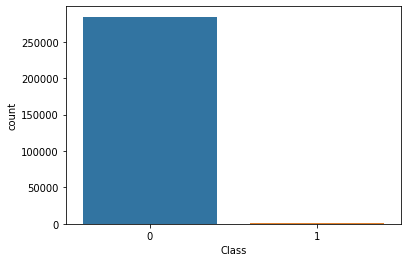

In [6]:
sns.countplot(df["Class"]);

Woah! there is very large diffrence between the class 0 and 1. It is an Imbalanced dataset<br>

## Features Correlation

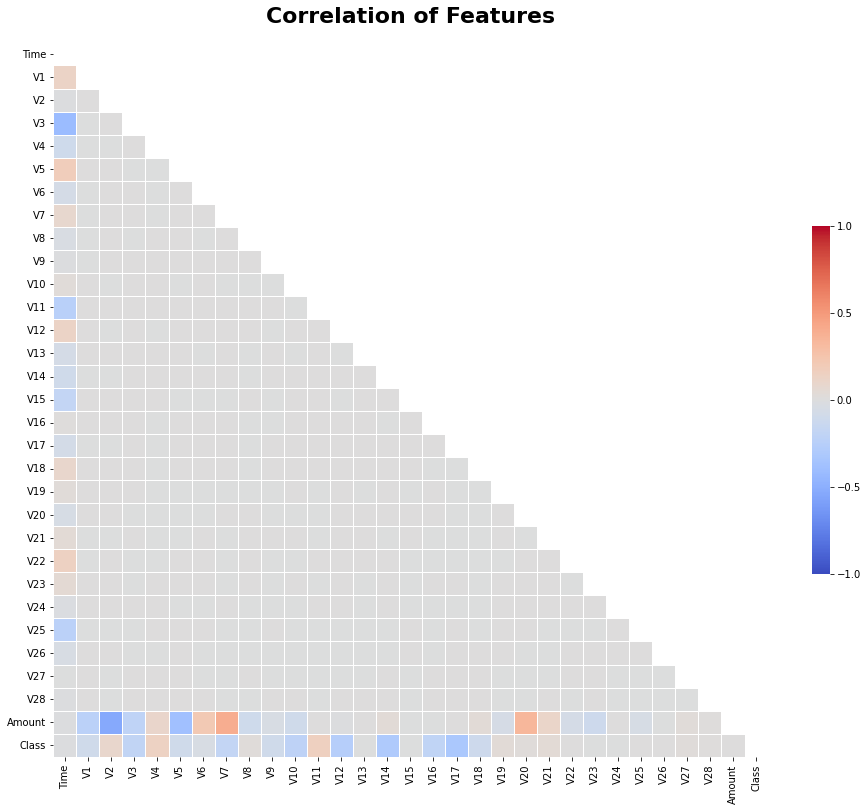

In [7]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

plt.figure(figsize=(16,16))
heatmap = sns.heatmap(df.corr(),
            mask = mask,
            square = True,
            linewidths = .5,
            cmap = 'coolwarm',
            cbar_kws = {'shrink': .4,"ticks" : [-1, -.5, 0, 0.5, 1]},
            vmin = -1,
            vmax = 1,
            annot = False,
            annot_kws = {"size": 8})

heatmap.set_title('Correlation of Features', size = 22, weight='bold', pad=20);

### **Correlation Matrices**

Correlation is a table that shows the relation between 2 features. It helps to understand data more deeply. With colors and heatmap chart it helps you to visualize and spot difference very efficiently.

<blockquote><b>📌 Summary:</b>
<ul>
    <li> <code>Positively Correlated:</code>  V2, V4, V11, are <em>positively correlated</em> with class.</li>
    <li> <code>Negetively Correlated:</code> V3, V5, V7, V12, V14, V17 are <em>negetively correlated</em> with class.</li>
    </ul>
</blockquote>

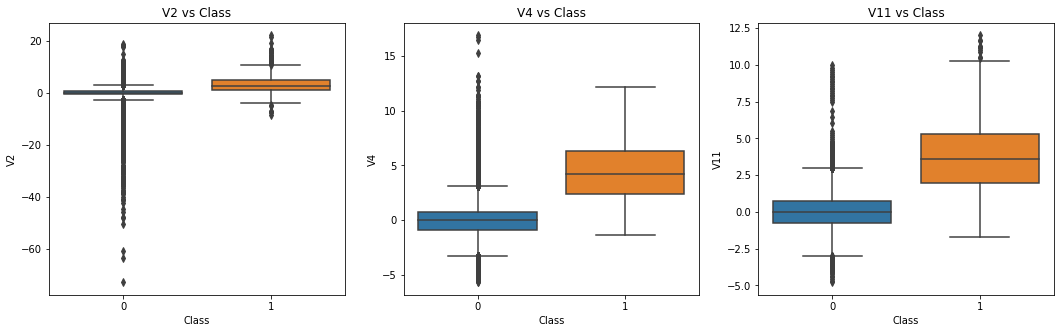

In [8]:
f, axes = plt.subplots(ncols=3, figsize=(18,5))

sns.boxplot(data=df, x="Class",y="V2", ax=axes[0])
axes[0].set_title("V2 vs Class")

sns.boxplot(data=df, y="V4",x="Class", ax=axes[1])
axes[1].set_title("V4 vs Class")

sns.boxplot(data=df, y="V11",x="Class", ax=axes[2])
axes[2].set_title("V11 vs Class");


<a id="3"></a>
# <center> <span style="font-family:Georgia"> <span style="color:white;font-weight:bold"> <span style="background:#4E3576"> 🦾 Model </span><a id="1"></a>
    

First we have to blance the data. for that we have to undersample or oversample if we do not have balanced data we will be using the recall and precision otherwise accuracy.

In [9]:
X = df.drop(columns='Class', axis=1)
y = df['Class']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [10]:
LR = LogisticRegression(solver='liblinear').fit(X_train,y_train)

Preds = LR.predict(X_train)
LR_AC = accuracy_score(Preds,y_train)

print(f'Accuracy Score = {LR_AC}')

Accuracy Score = 0.9991792666066843


In [11]:
Preds2 = LR.predict(X_test)
LR_AC2 = accuracy_score(Preds2,y_test)

print(f'Accuracy Score = {LR_AC2}')

Accuracy Score = 0.9989993328885924


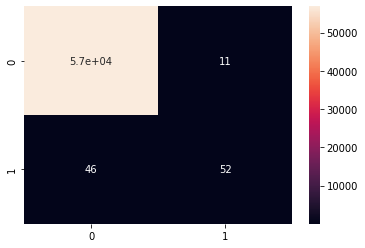

In [12]:
sns.heatmap(confusion_matrix(y_test,Preds2),annot = True,);

In [13]:
print(classification_report(y_test, Preds2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.53      0.65        98

    accuracy                           1.00     56962
   macro avg       0.91      0.77      0.82     56962
weighted avg       1.00      1.00      1.00     56962



<blockquote><b>📌 Summary:</b>
<ul>
    <li> There is a huge error on algo where the precision 0(not fraud) is getting predicted 1.0(100%) but 1(fraud) is only 65 accurate the model is not accurate enough to predict to train on new data.</li>
    <li> We have to train it with same balanced data and check what's the score of each class.</li>
    </ul>
</blockquote>

### Undersampling Technique

Undersampling is a technique to balance uneven datasets by keeping all of the data in the minority class and decreasing the size of the majority class. It is one of several techniques data scientists can use to extract more accurate information from originally imbalanced datasets.

In [14]:
legit = df[df["Class"] == 0]
fraud = df[df["Class"] == 1]


print(f'Legit: {fraud.Class.value_counts()[1]} & Fraud : {legit.Class.value_counts()[0]}')

Legit: 492 & Fraud : 284315


In [15]:
ls = legit.sample(n=492)
ls.Class.value_counts()

0    492
Name: Class, dtype: int64

In [16]:
df2 = pd.concat([fraud,ls], axis = 0)

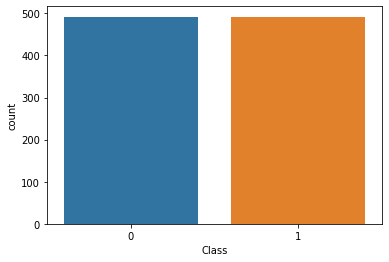

In [17]:
sns.countplot(df2["Class"]);

The class has been balanced by equal values. Lets perform modeling on this new balanced data

In [18]:
X = df2.drop(columns='Class', axis=1)
y = df2['Class']

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [20]:
model = LogisticRegression(solver='liblinear').fit(X_train,y_train)

In [21]:
pred = model.predict(X_train)
actr = accuracy_score(pred,y_train)
print(f'Accuracy Score = {actr}')

Accuracy Score = 0.9250317662007624


In [22]:
pred = model.predict(X_test)
acts = accuracy_score(pred,y_test)
error_rate = 1 - acts
print(f'Accuracy Score = {acts}')
print(f'error_rate = {error_rate}')

Accuracy Score = 0.9543147208121827
error_rate = 0.045685279187817285


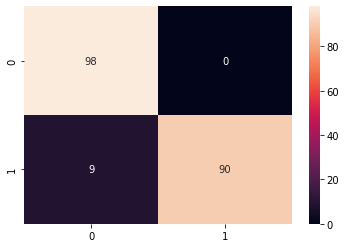

In [23]:
sns.heatmap(confusion_matrix(y_test,pred),
                annot = True,
                );

In [24]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        98
           1       1.00      0.91      0.95        99

    accuracy                           0.95       197
   macro avg       0.96      0.95      0.95       197
weighted avg       0.96      0.95      0.95       197



<blockquote><b>📌 Summary:</b>
<ul>
    <li> Now We have trained the model with the balanced dataset and the accuracy is around <code>95%</code> for this model.</li>
    <li> the <code>f1 score</code> is <code>95%</code> and <code>94%</code> for both classes which is very fit but can we improve the model further for good accuracy?</li>
    </ul>
</blockquote>

## <center> <span style="font-family:Georgia"> <span style="color:white;font-weight:bold"> <span style="background:#4E3576">✌️ If you like my notebook and found it usefull please do upvote</span>